In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
np.random.seed(42)

def generate_data(nx, qtde, pmax):
    x = np.linspace(-1, 1, nx).reshape(-1, 1)
    y = []
    dy = []
    
    for _ in range(qtde):
        # potencial de grau p aleatório
        p = np.random.randint(0, pmax+1)# aqui trocar os graus de polinômios (0,pmax+1)
        
        # polinomio de grau p aleatório
        #coeffs = np.random.randn(p + 1) #ori
        # valores entre -6 a 5 com p+1 valores.
        coeffs=np.random.randint(-6,6,p+1) # mod
        # gerar uma lista de zeros e uns dependendo de valor de p.
        mono=[(j+1)%2 for j in range(p+1)] # mod
        coeffs=coeffs*np.array(mono) # mod
        # polinomio com ruído
        polinomio = np.polyval(coeffs, x)
        noise = 0.1 * np.random.randn(len(x)).reshape(-1, 1)
        polinomio=polinomio+noise # mod
        #y.append(polinomio / np.max(np.abs(polinomio)) + noise) # or
        y.append(polinomio / np.max(np.abs(polinomio)))# modi
        
        # derivada
        noise = 0.1 * np.random.randn(len(x)).reshape(-1, 1)
        derivada = np.polyval(np.polyder(coeffs), x) + noise # modi
        #dy.append(np.polyval(np.polyder(coeffs), x) / np.max(np.abs(polinomio)) + noise) #ori
        dy.append(derivada / np.max(np.abs(derivada))) # modi
    
    # empilha dados
    y = np.hstack(y).T
    dy = np.hstack(dy).T
    return y, dy

# gerar dados
y, dy = generate_data(50, 10000, 10)

print(y.shape)
print(dy.shape)


(10000, 50)
(10000, 50)


In [3]:

# separa os os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(y, dy, test_size=0.2, random_state=42)

neurons = 10
layers = 10

# define modelo
model = MLPRegressor(
    hidden_layer_sizes=tuple([neurons] * layers), 
    activation='tanh',
    solver='adam',
    max_iter=100000, 
    random_state=42,
    learning_rate='adaptive',
    learning_rate_init = 0.001,
    n_iter_no_change = 50,
    tol = 1e-8,
    verbose=True)

# treinamento
model.fit(X_train, y_train)

# teste
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")



Iteration 1, loss = 0.14490116
Iteration 2, loss = 0.12219190
Iteration 3, loss = 0.09737261
Iteration 4, loss = 0.07098074
Iteration 5, loss = 0.05284027
Iteration 6, loss = 0.04285459
Iteration 7, loss = 0.03693270
Iteration 8, loss = 0.03356263
Iteration 9, loss = 0.03143301
Iteration 10, loss = 0.03020926
Iteration 11, loss = 0.02929957
Iteration 12, loss = 0.02844847
Iteration 13, loss = 0.02783147
Iteration 14, loss = 0.02689554
Iteration 15, loss = 0.02616460
Iteration 16, loss = 0.02522160
Iteration 17, loss = 0.02427825
Iteration 18, loss = 0.02318991
Iteration 19, loss = 0.02223113
Iteration 20, loss = 0.02120381
Iteration 21, loss = 0.02039177
Iteration 22, loss = 0.02000626
Iteration 23, loss = 0.01950561
Iteration 24, loss = 0.01934476
Iteration 25, loss = 0.01917831
Iteration 26, loss = 0.01912102
Iteration 27, loss = 0.01900456
Iteration 28, loss = 0.01876718
Iteration 29, loss = 0.01868077
Iteration 30, loss = 0.01849830
Iteration 31, loss = 0.01850488
Iteration 32, los

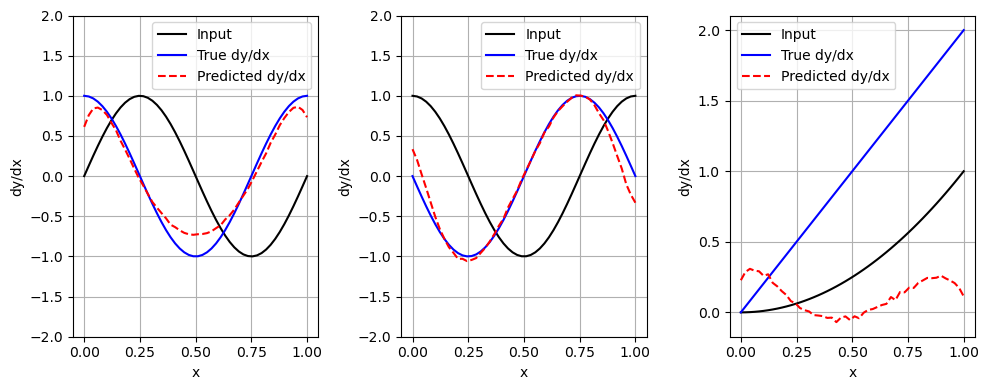

In [ ]:
plt.figure(figsize=(10, 4))

new_x = np.linspace(0, 1, y.shape[1]).reshape(1,-1) # fazer mudança de valores em domínio da função.

# test 1
plt.subplot(131)
new_y = np.sin(2*np.pi*new_x)
new_dy = np.cos(2*np.pi*new_x)
predicted_derivative = model.predict(new_y)

plt.plot(new_x[0], new_y[0], label='Input', color='black')
plt.plot(new_x[0], new_dy[0], label='True dy/dx', color='blue')
plt.plot(new_x[0], predicted_derivative[0], label='Predicted dy/dx', color='red', linestyle='dashed')
plt.ylim(-2,2)
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.grid(True)

# test 2
plt.subplot(132)
new_y = np.cos(2*np.pi*new_x)
new_dy = -np.sin(2*np.pi*new_x)
predicted_derivative = model.predict(new_y)

plt.plot(new_x[0], new_y[0], label='Input', color='black')
plt.plot(new_x[0], new_dy[0], label='True dy/dx', color='blue')
plt.plot(new_x[0], predicted_derivative[0], label='Predicted dy/dx', color='red', linestyle='dashed')
plt.ylim(-2,2)
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.grid(True)

# test 3
plt.subplot(133)
new_y = new_x ** 2
new_dy = 2 * new_x
predicted_derivative = model.predict(new_y)

plt.plot(new_x[0], new_y[0], label='Input', color='black')
plt.plot(new_x[0], new_dy[0], label='True dy/dx', color='blue')
plt.plot(new_x[0], predicted_derivative[0], label='Predicted dy/dx', color='red', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

